In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [14]:
X=pd.read_csv('../train_x.csv')
Y=pd.read_csv('../train_y.csv')
Y=Y['target'].to_numpy()
#X.drop(['Unnamed: 0'],axis=1,inplace=True)
X=X.to_numpy()

In [15]:


x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [16]:
xg_train = xgb.DMatrix(x_train, label=y_train)
xg_test = xgb.DMatrix(x_test, label=y_test)

In [17]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic',
    'n_estimators':300}
num_round = 20  # the number of training iterations
watchlist = [(xg_test, 'eval'), (xg_train, 'train')]
model = xgb.train(param, xg_train, num_round)

[12:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:

y_prob_pos= model.predict(xg_train)
y_pred=np.asarray([1 if x>0.1 else 0 for x in y_prob_pos])

In [19]:
y_pred.sum()

6189

In [20]:
score=roc_auc_score(y_train,y_prob_pos)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_train,y_pred)))
print('precision  is :'+str(precision_score(y_train,y_pred)))
print('f1 score is :'+str(f1_score(y_train,y_pred)))
print('recall score is :'+str(recall_score(y_train,y_pred)))


AUC score is 0.7024438096147939
Accuracy score is :0.5773091588203253
precision  is :0.19502342866375827
f1 score is :0.30767269946469533
recall score is :0.7284248642124321


In [21]:
y_prob_pos_test=model.predict(xg_test)
score=roc_auc_score(y_test,y_prob_pos_test)
y_pred_test=np.asarray([1 if x>0.1 else 0 for x in y_prob_pos_test])
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_test,y_pred_test)))
print('precision  is :'+str(precision_score(y_test,y_pred_test)))
print('f1 score is :'+str(f1_score(y_test,y_pred_test)))
print('recall score is :'+str(recall_score(y_test,y_pred_test)))

AUC score is 0.6636842365506329
Accuracy score is :0.5787944807552651
precision  is :0.20084811102544334
f1 score is :0.30993456276026177
recall score is :0.6783854166666666


In [22]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)


[[2667 2073]
 [ 247  521]]


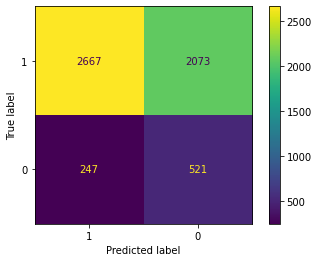

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()


In [24]:
fpr, tpr, threshold = roc_curve(y_train, y_prob_pos)


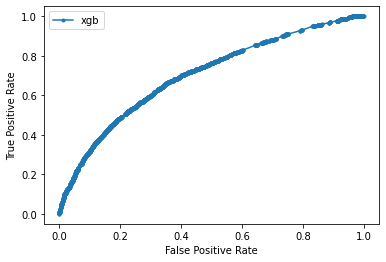

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

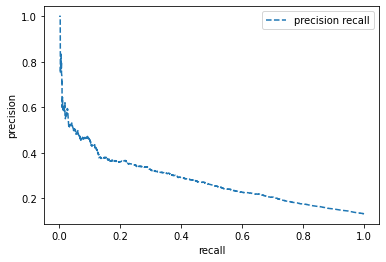

In [26]:
precision,recall,threshold=precision_recall_curve(y_train, y_prob_pos)
plt.plot(recall, precision, linestyle='--', label='precision recall')

# axis labels
plt.xlabel('recall')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [27]:
threshold=np.insert(threshold,0,0)


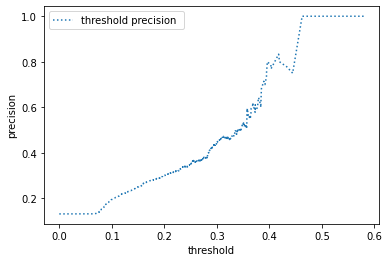

In [28]:
plt.plot(threshold, precision, linestyle='dotted', label='threshold precision ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()



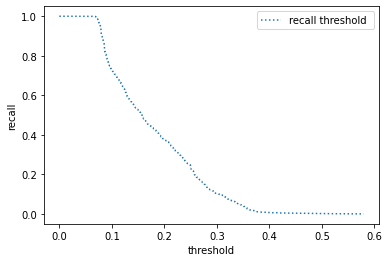

In [29]:
plt.plot(threshold, recall, linestyle='dotted', label='recall threshold ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('recall')
# show the legend
plt.legend()
# show the plot
plt.show()

In [30]:
X_val=pd.read_csv('../test_x.csv').to_numpy()
X_val= xgb.DMatrix(X_val)

In [31]:
y_prob_pos_test=model.predict(X_val)


In [32]:
y_val=pd.read_csv('../test_y.csv')

In [33]:
y_val['target']=y_prob_pos_test

In [34]:
y_val.to_csv('xgb.csv',index=False)